In [1]:
import pandas as pd
import seaborn as sns 
from pandas import DataFrame
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import numpy as np
import plotly
import statistics
import plotly.express as px
import stats
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
import plotly.express as px
import datetime
import datetime as dt
import time
import django.template.backends.jinja2

In [2]:
c='Cyber Security Breaches.csv'
df=pd.read_csv(c)
print(df)

      Unnamed: 0  Number                             Name_of_Covered_Entity  \
0              1       0                         Brooke Army Medical Center   
1              2       1          Mid America Kidney Stone Association, LLC   
2              3       2    Alaska Department of Health and Social Services   
3              4       3  Health Services for Children with Special Need...   
4              5       4                           L. Douglas Carlson, M.D.   
...          ...     ...                                                ...   
1050        1051    1050                      Puerto Rico Health Insurance    
1051        1052    1051                       Hospitalists of Brandon, LLC   
1052        1053    1052                      Santa Rosa Memorial Hospital    
1053        1054    1053         Group Health Plan of Hurley Medical Center   
1054        1055    1054                            Abrham Tekola, M.D.,INC   

     State          Business_Associate_Involved  In

In [3]:
cols = ['Type_of_Breach','Summary','State','Individuals_Affected','Name_of_Covered_Entity'
        ,'Location_of_Breached_Information','year','Date_Posted_or_Updated']

In [4]:
year_order = df['year'].value_counts().index
state_order = df['State'].value_counts().index
attack_order = df['Type_of_Breach'].value_counts().index

In [5]:
df = df[cols].reset_index(drop=True)
df =df.loc[df['year']>2006]
df =df.loc[df['State'].isin(state_order[:20])]
# breaches = df.Type_of_Breach.value_counts()[:6].index
df = df.loc[df['Type_of_Breach'].isin(attack_order[:6])]
df['Summary'] = df['Summary'].fillna('No Summary')

In [6]:
df.shape


(718, 8)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 0 to 1054
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Type_of_Breach                    718 non-null    object
 1   Summary                           718 non-null    object
 2   State                             718 non-null    object
 3   Individuals_Affected              718 non-null    int64 
 4   Name_of_Covered_Entity            718 non-null    object
 5   Location_of_Breached_Information  718 non-null    object
 6   year                              718 non-null    int64 
 7   Date_Posted_or_Updated            718 non-null    object
dtypes: int64(2), object(6)
memory usage: 33.7+ KB


In [8]:
df.describe()

,Individuals_Affected,year
count,7.180000e+02,718.000000
mean,2.691706e+04,2011.518106
std,1.880920e+05,1.387966
min,5.000000e+02,2007.000000
25%,1.000000e+03,2010.000000
50%,2.262500e+03,2012.000000
75%,6.658750e+03,2013.000000
max,4.029530e+06,2014.000000


Which year has the highest number of attacks?
What is the most common cyber-attack?
What is the most reported cyber-attack state?

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 9 Text xticklabel objects>)

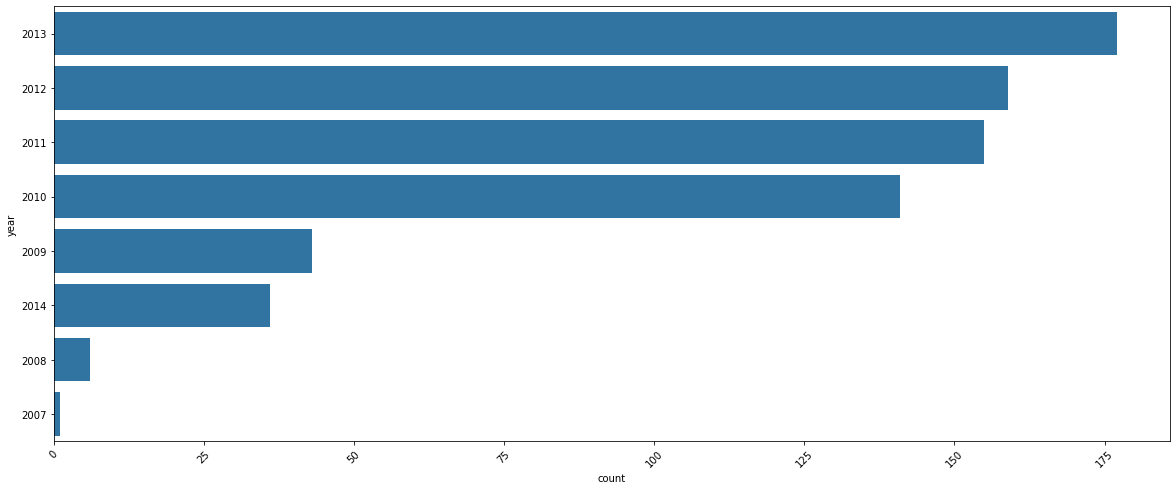

In [18]:

base_color = sns.color_palette()[0]
year_order = df['year'].value_counts().index
state_order = df['State'].value_counts().index
attack_order = df['Type_of_Breach'].value_counts().index

plt.figure(figsize=(20,8))
sns.countplot(data=df,y='year',color=base_color,order=year_order)
plt.xticks(rotation=45)

2013 is worst

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 <a list of 10 Text xticklabel objects>)

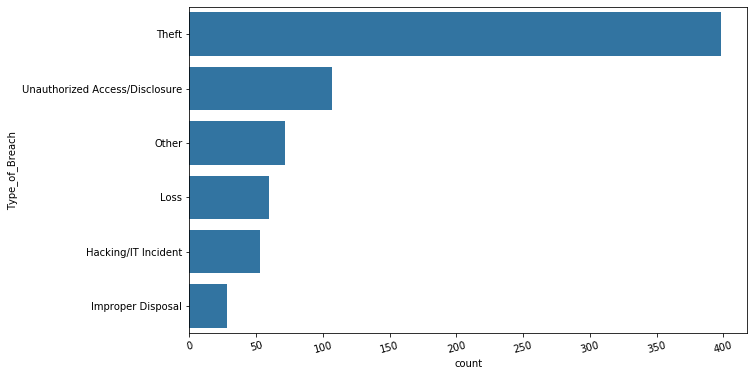

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,y='Type_of_Breach',color=base_color,order=attack_order)
plt.xticks(rotation=15)

Since theft is most comon crime, let's see the state sunshine state

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

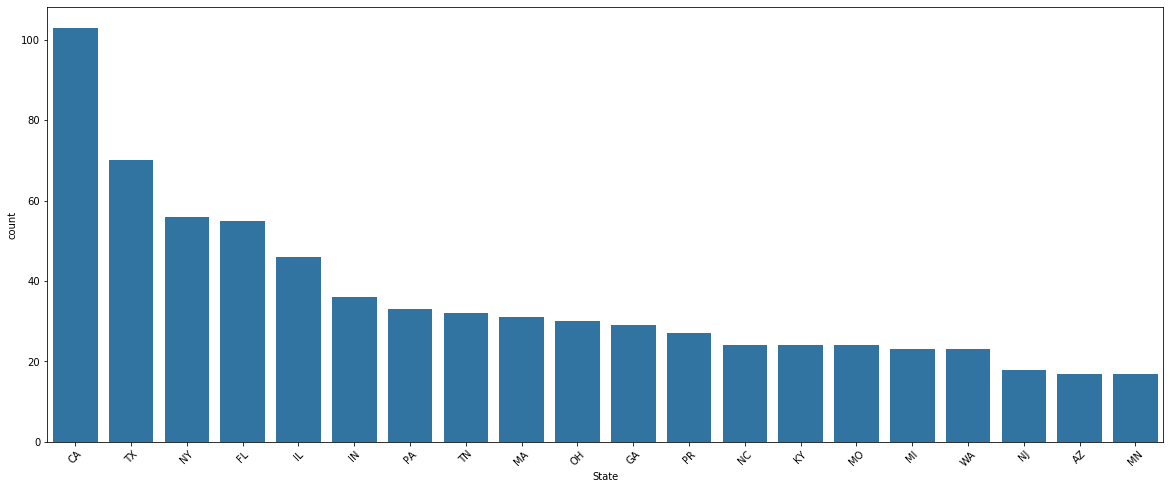

In [30]:
plt.figure(figsize=(20,8))
sns.countplot(data=df,x='State',color=base_color,order=state_order)
plt.xticks(rotation=45)

Bi-variate
What is the relation between the year and Individuals Affected ?

In [33]:
cyber=df[['Individuals_Affected', 'year','State','Type_of_Breach']].copy()

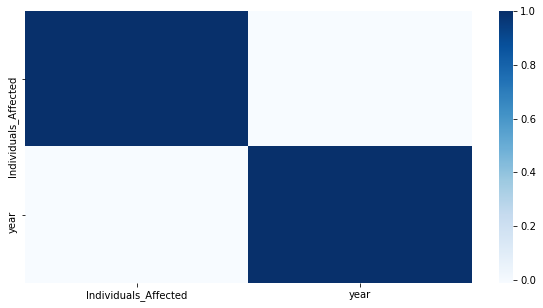

In [34]:
plt.figure(figsize=(10,5))
sns.heatmap(cyber.corr(),cmap='Blues')
plt.show()

(array([2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
        2015.]),
 <a list of 10 Text xticklabel objects>)

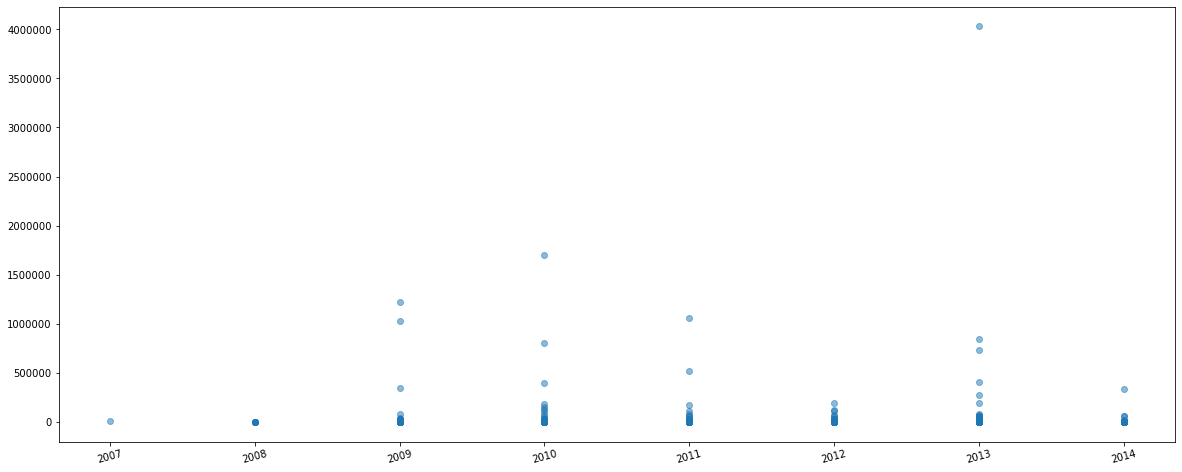

In [35]:
plt.figure(figsize=(20,8))
plt.scatter(data = df, y = 'Individuals_Affected', x = 'year', alpha=1/2)
plt.xticks(rotation=15)

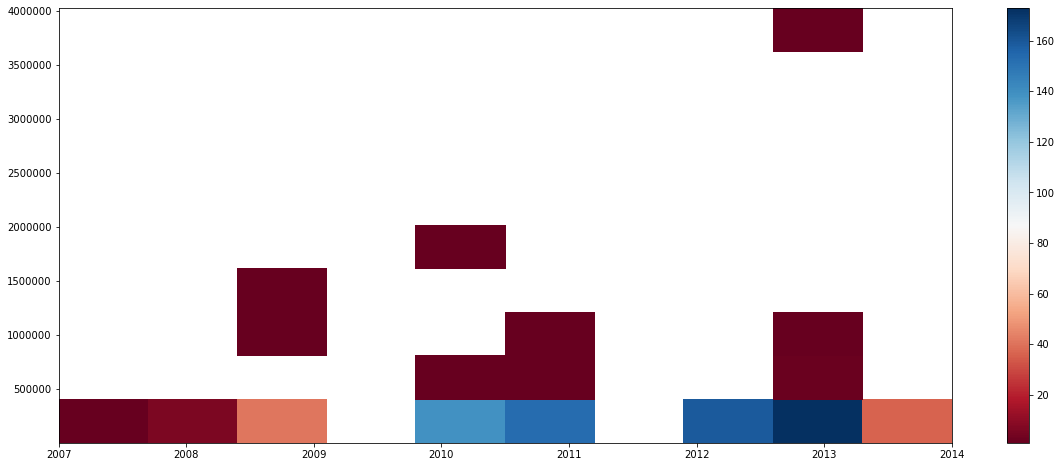

In [38]:
plt.figure(figsize=(20,8))
plt.hist2d(data = df, y = 'Individuals_Affected', x = 'year',cmin=0.5,cmap = 'RdBu')
plt.colorbar()

(array([2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
        2015.]),
 <a list of 10 Text xticklabel objects>)

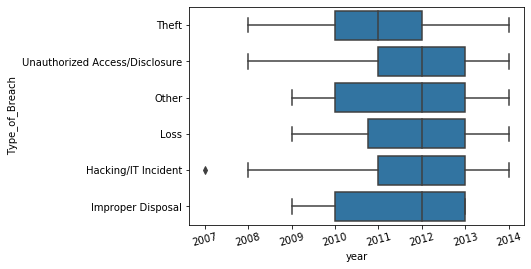

In [40]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df, y='Type_of_Breach', x='year', color=base_color,order=attack_order)
plt.xticks(rotation=15)